# Bibliothèques

##### Pour faire fonctionner les widgets, il est nécessaire d'installer le package ipywidgets via : pip install ipywidgets
#### puis d'utiliser la commande : jupyter nbextension enable --py widgetsnbextension

In [1]:
%matplotlib inline

## Modules de calcul
import numpy as np
from numpy.matlib import repmat
import pandas as pd

## Modules graphiques
import matplotlib.pyplot as plt
import seaborn
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
sns.set(color_codes=True)
from IPython.html.widgets  import widgets, interact
from IPython.display import display, clear_output
import colorlover as cl

## Fichiers locaux
from tools import *


/home/pierre/miniconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



# Fonctions et classes annexes :

In [2]:
def figure_size(width, height):
    """ Allow to choose the size of scatter plot """

    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    
    return 

In [3]:
class Perceptron:
    def __init__(self,max_iter = 100,eps=1e-3,projection = None):
        self.max_iter = max_iter
        self.eps = eps
        self.projection = projection or (lambda x: x) #projection fonction identite par default

    def fit(self,data,y):
        data = self.projection(data)
        self.w = np.random.random((1,data.shape[1]))
        self.winit = self.w.copy()
        self.histo_w  = np.zeros((self.max_iter,data.shape[1]))
        self.histo_f = np.zeros((self.max_iter,1))
        ylab=set(y.flat)
        if len(ylab) != 2:
            print("pas bon nombres de labels (%d)" % (ylab,))
            return
        self.labels = {-1: min(ylab), 1:max(ylab)}
        y = 2*(y!=self.labels[-1])-1
        i=0
        print("Itérations de l'algorithme d'apprentissage ... \n")
        while i<self.max_iter:
            idx = range(len(data))
            for j in idx:
                self.w = self.w - self.get_eps()*self.loss_g(data[j],y[j:(j+1)])
            self.histo_w[i] = self.w
            self.histo_f[i] = self.loss(data,y)
            if i % 20==0: print(i,self.histo_f[i])
            i+=1
    def predict(self,data):
        data = self.projection(data)
        return np.array([self.labels[x] for x in np.sign(data.dot(self.w.T)).flat]).reshape((len(data),))
    
    def score(self,data,y):
        return np.mean(self.predict(data)==y)
    
    def predict_w(self, data, w):
        data = self.projection(data)
        return np.array([self.labels[x] for x in np.sign(data.dot(w.T)).flat]).reshape((len(data),))
    
    def score_w(self, data, y, w):
        return np.mean(self.predict_w(data, w)==y)

    def get_eps(self):
        return self.eps
   
    def loss(self,data,y):
        return hinge(self.w,data,y)
    
    def loss_g(self,data,y):
        return grad_hinge(self.w,data,y)
    
    def errors(self, data, y, legend=None):
        iterations = np.arange(self.max_iter)
        erreurs = []
        data = self.projection(data)
        for it in iterations:
            erreurs.append(1 - self.score_w(data, y,self.histo_w[it]))
        plt.plot(iterations, erreurs, label=legend)
        plt.xlabel("Nombre d'itérations")
        plt.ylabel("Erreur")

# Question 1 : Implémentation du perceptron

## Question 1.1 :

In [4]:
def hinge(w, data, y):
    data,y,w=data.reshape(len(y),-1),y.reshape(-1,1),w.reshape(1,-1)
    res = -y*(np.dot(data, w.T))
    res[res < 0] = 0
    return res.mean()

def grad_hinge(w, data, y):
    data,y,w=data.reshape(len(y),-1),y.reshape(-1,1),w.reshape(1,-1)
    l, col = np.shape(data)
    grad = -y*data
    res = -y*(np.dot(data, w.T))
    res = repmat(res, 1, col)
    grad = np.where(res<0, 0, grad)
    return grad.mean(axis=0)

#### Test des fonctions hinge, grad_hinge

In [5]:
w = np.random.random((3,))
data = np.random.random((100,3))
y = np.random.randint(0,2,size = (100,1))*2-1
print(hinge(w,data,y), hinge(w,data[0],y[0]), hinge(w,data[0,:],y[0]))
print(grad_hinge(w,data,y),grad_hinge(w,data[0],y[0]).shape,grad_hinge(w,data[0,:],y[0]).shape)

0.202685583275 0.0 0.0
[ 0.21809575  0.24479154  0.23404498] (3,) (3,)


## Question 1.2 :

In [6]:
def question12(data_type=0, epsilon=0.3, eps=1e-3):

    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)

    plt.ion()

    ### Apprentissage
    model= Perceptron(eps=eps)
    model.fit(xtrain,ytrain)
    
    ### Scores
    print("\nScore sur les données d'apprentissage : ",model.score(xtrain,ytrain))
    print("Score sur les données de test : ",model.score(xtest,ytest))
    
    #### Tracer de frontiere
    plt.figure()
    plot_frontiere(xtrain,model.predict,50)
    plot_data(xtrain,ytrain)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.title("Données d'apprentissage et la frontière")

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.00045361]
20 [ 0.00013763]
40 [  7.57452557e-05]
60 [  7.29610071e-05]
80 [  7.01767585e-05]

Score sur les données d'apprentissage :  0.999
Score sur les données de test :  0.999


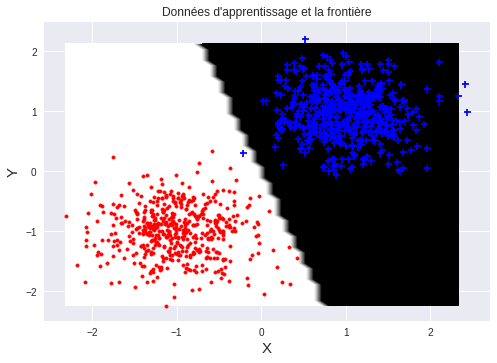

In [7]:
question12()

### Question 1.3 :

In [8]:
## Représentation de la trajectoire de w

def surface_3D(fonc, w1min=-1.1, w1max=1.1, w2min=-1.1, w2max=1.1, 
               colorscale='Viridis'):

    ### Surface de la fonction de perte
    w1 = np.linspace(w1min,w1max,num=40)
    w2 = np.linspace(w2min,w2max,num=40)
    fw = np.array([[fonc(np.array([xi,yi])) for yi in w2] for xi in w1])
    
    data_f = pd.DataFrame(data=fw)

    trace1 = go.Surface(
        x = w1,
        y = w2,
        z = data_f.as_matrix(),
        opacity=0.9,
        colorscale=colorscale,
        name = "Hinge loss"
    )
    
    return trace1

In [9]:
def slider_3D(ite, x_histo, f_histo, trace1, fig=None, w=5, h=5):
    
    clear_output()
    fig.clf()
    fig = plt.figure()
    data = [trace1]
    
    ### Représentation des itérations de descente :
    xs = x_histo[:ite,0].reshape(-1)
    ys = x_histo[:ite,1].reshape(-1)
    zs = f_histo[:ite].reshape(-1)

    trace2 = go.Scatter3d(
        x=xs,
        y=ys,
        z=zs,
        marker=dict(
            size=5,
            color='rgb(200, 0, 0)', # set color to an array/list of desired values   # choose a colorscale
            opacity=4,
        ),
        line=dict(
            color='rgb(200, 0, 0)',
            width=2
        ),
    )

    data.append(trace2)

    layout = dict(margin=go.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=0,
                    ),
                  scene = dict(
                        xaxis = dict(
                            title='w1'),
                        yaxis = dict(
                            title='w2'),
                    ), 
                 )

    fig = dict(data=data, layout=layout)
    py.iplot(fig)

In [10]:
def slider_heatmap(ite, f, model, w1min=-1.1, w1max=1.1, w2min=-1.1, 
                   w2max=1.1, nb=100, w=5, h=5):
    
    ### Données à afficher
    w1_x = np.linspace(w1min,w1max,num=nb)
    w2_y = np.linspace(w2min,w2max,num=nb)
    pdf = np.array([[f(np.array([w2_y[-1-i],w1_x[j]])) for j in range(nb)] for i in range(nb)])
    w1_hist = nb/2*(model.histo_w[:, 0]) + nb/2
    w2_hist = nb/2*(model.histo_w[:, 1]) + nb/2
    
    ### Valeurs des poids
    print("Valeur initiale des poids :", model.histo_w[0, :])
    print("Valeur finale des poids :", model.histo_w[-1, :])
    
    ### Heatmap 
    plt.figure()
    ax = sns.heatmap(pdf.T, cmap="Spectral_r", square=True,
                     xticklabels=False, yticklabels=False)
    plt.scatter(w1_hist[:ite+1], w2_hist[:ite+1], alpha=0.6, 
                color="red")
    plt.grid()
    plt.xlabel('W1', fontsize=15)
    plt.ylabel('W2', fontsize=15)
    plt.title("Trajectoire de l'apprentissage dans l'espace des poids \n", 
              fontsize=15)
    plt.show()

In [11]:
def question13(mode=1, eps=1e-3, max_iter=50, centerx=1, sigma=1, nbex=1000,
               data_type=0, epsilon=0.02, w2min=-3, w2max=3, w=8, h=8):

    fig1 = plt.figure()
    
    ### Données artificielles:
    xtrain, ytrain = gen_arti(centerx=centerx, sigma=sigma, nbex=nbex,
                              data_type=data_type, epsilon=epsilon)
    
    f = lambda w : hinge(w, xtrain, ytrain)

    ### Compute of the model
    model = Perceptron(eps=1e-3, max_iter=max_iter)
    model.fit(xtrain,ytrain)
    
    ### Compute of the colorscale
    cls=[[0, 'rgb(0,0,131)'], [0.0075, 'rgb(0,60,170)'],
         [0.125, 'rgb(5,255,255)'], [0.325, 'rgb(255,255,0)'],
         [0.575, 'rgb(250,0,0)'], [1, 'rgb(128,0,0)']]

    ### 3D graphic
    trace1 = surface_3D(f, colorscale=cls)
    
    s1 = lambda ite: slider_3D(ite, model.histo_w, model.histo_f, 
                               trace1, fig=fig1, w=w, h=h)

    ### 2D graphic
    s2 = lambda ite : slider_heatmap(ite, f, model, w=w, h=h)
    
    if mode==1 :
        res = interact(s1, ite=widgets.IntSlider(min=0,max=max_iter,
                                                 step=2,value=0))
    if mode==2 :
        res = interact(s2, ite=widgets.IntSlider(min=0,max=max_iter,
                                                 step=2,value=0))

In [12]:
question13(mode=1)

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.03192799]
20 [  8.37839322e-05]
40 [  8.09760945e-05]


In [13]:
question13(mode=2)

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.02890586]
20 [ 0.00012116]
40 [ 0.00018606]


## A COMPLETER

# 2 Données USPS

## Question 2.1

In [14]:
def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    """ l : liste des chiffres a extraire"""
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    idx = np.random.permutation(range(len(tmpy)))
    return tmpx[idx,:],tmpy[idx]

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [15]:
xuspstrain,yuspstrain = load_usps("USPS_train.txt")
xuspstest,yuspstest = load_usps("USPS_test.txt")
x06train,y06train = get_usps([0,6],xuspstrain,yuspstrain)
x06test,y06test = get_usps([0,6],xuspstest,yuspstest)

model = Perceptron(max_iter=150)
model.fit(x06train, y06train)
print("score en train : ",model.score(x06train,y06train))
print("score en test : ",model.score(x06test,y06test))
print("weight matrix : ", model.w)

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.40808818]
20 [ 0.01496488]
40 [ 0.0047047]
60 [ 0.00213686]
80 [ 0.00026125]
100 [ 0.]
120 [ 0.]
140 [ 0.]
score en train :  1.0
score en test :  0.982986767486
weight matrix :  [[  8.10507944e-01   2.21108005e-02   8.02486514e-01   7.67702521e-01
   -2.10475805e-01   1.74754358e-01  -5.51142574e-01  -4.52597681e-02
    3.35983522e-01   2.23462589e-01   1.60154520e-01   6.94976083e-01
    5.76271503e-01   5.51102116e-01   3.08958024e-01   8.27998012e-01
    7.67609659e-01   9.28559551e-02   3.37990543e-01   2.23020641e-02
   -7.53518226e-02  -2.58268376e-01  -1.76586950e-01  -6.53684028e-01
    5.13637405e-02   1.48382827e-01  -1.96592281e-01  -1.05786560e-01
    7.52260953e-02   3.09662535e-01   8.18909097e-01   8.16582635e-01
    5.97356789e-01   7.19185443e-01   2.36371025e-01  -1.65468345e-01
   -1.34220012e-01  -1.59784750e-01  -7.35735039e-01  -3.78240413e-01
   -3.28521521e-01  -1.35317820e-03  -6.48122129e-01  -4.30414477e-

In [16]:
xtrain,ytrain = get_usps([1, 2, 6, 8],xuspstrain,yuspstrain)
xtest,ytest = get_usps([1, 2, 6, 8],xuspstest,yuspstest)


ytrain = np.where(np.logical_or(ytrain==1, ytrain==2), 1, -1)
ytest = np.where(np.logical_or(ytest==1, ytest==2), 1, -1)

model2 = Perceptron(max_iter=150)
model2.fit(xtrain, ytrain)
print("score en train : ",model2.score(xtrain,ytrain))
print("score en test : ",model2.score(xtest,ytest))
print("weight matrix : ", model2.w)

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.54413284]
20 [ 0.04865088]
40 [ 0.02631177]
60 [ 0.01878644]
80 [ 0.01715555]
100 [ 0.01529771]
120 [ 0.01044864]
140 [ 0.0092786]
score en train :  0.968728755948
score en test :  0.928571428571
weight matrix :  [[ 0.6143632   0.19246228 -0.04992028  0.14580095  0.04228759 -0.3549879
  -0.07890865  0.42871358  0.10231436  0.33653728  0.06108926 -0.10357463
   0.03191248  0.30992699 -0.07468851  0.69223071  0.50026727  0.43744124
  -0.56116545  0.30881062  0.45616299 -0.19218606  0.25515165  0.54864753
   0.08294958  0.28051743 -0.42447014 -0.04865436 -0.13548763 -0.46583308
   0.24233288  0.03822439 -0.23035123 -0.33070898  0.33843133 -0.26047672
   0.0017714   0.23141666 -0.31115518  0.12529366  0.13520572  0.08199328
  -0.28102121  0.09576758 -0.07666862  0.1138423   0.20530257  0.64554384
  -0.18438695  0.05369418 -0.12963804 -0.01461204  0.08784236 -0.06820029
   0.07412841  0.30407888 -0.15849612  0.42180007 -0.24360842  0.19

In [17]:
x1alltrain,y1alltrain = get_usps([i for i in range(10)],xuspstrain,yuspstrain)
x1alltest,y1alltest = get_usps([i for i in range(10)],xuspstest,yuspstest)

y1alltrain[y1alltrain != 1] = -1
y1alltest[y1alltest != 1] = -1

model3 = Perceptron(max_iter=150)
model3.fit(x1alltrain, y1alltrain)
print("score en train : ",model3.score(x1alltrain,y1alltrain))
print("score en test : ",model3.score(x1alltest,y1alltest))
print("weight matrix : ", model3.w)

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.07026189]
20 [ 0.00572682]
40 [ 0.00387385]
60 [ 0.00299458]
80 [ 0.00236222]
100 [ 0.0020005]
120 [ 0.00165442]
140 [ 0.00145173]
score en train :  0.996982581265
score en test :  0.990533134031
weight matrix :  [[ 0.06876071  0.40993935  0.38916784  0.56592543 -0.15393847 -0.30646176
   0.02085334  0.29191071 -0.22555179  0.1518657   0.30584808 -0.20970793
  -0.04611287  0.6026258   0.75531984  0.63363144  0.40517571 -0.26548107
   0.17754231 -0.3580815   0.03981404  0.07131782 -0.1740732  -0.39589515
  -0.34493995 -0.40305866 -0.20019469  0.11444203 -0.09111196  0.30676079
   0.27334081  0.07428737  0.14354183  0.61489192 -0.21199126 -0.27937349
  -0.70758048 -0.14858395 -0.18411528  0.34086201  0.12957153 -0.18068432
   0.19282239 -0.47990263  0.09544239 -0.37053419  0.07582962  0.09261649
   0.7924883   0.16248349 -0.14326597 -0.6743264  -0.41732985 -0.51292045
   0.40608591  0.39186568 -0.24599202  0.33832225 -0.19244458 -0.3

## Question 2.2

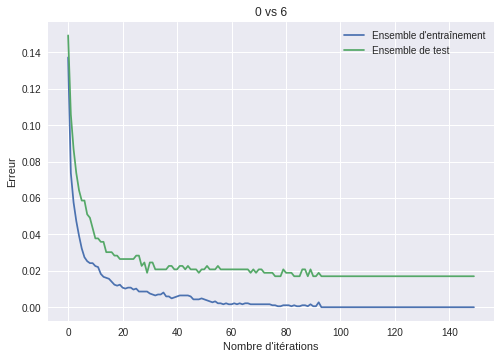

In [18]:
plt.figure()
model.errors(x06train, y06train, "Ensemble d'entraînement")
model.errors(x06test, y06test, "Ensemble de test")
plt.title("0 vs 6")
plt.legend()

Sur le graphe ci-dessus, on observe que l'erreur sur l'ensemble de test est décroissante. Elle devient constante à partir d'un certain nombre d'itérations, mais n'**augmente pas**. A ce titre, on peut dire que l'on **n'observe pas de surapprentissage** dans cette configuration

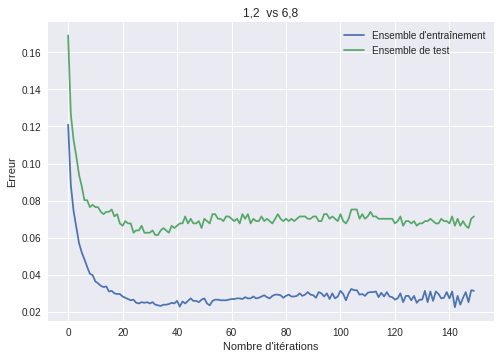

In [19]:
plt.figure()
model2.errors(xtrain, ytrain, "Ensemble d'entraînement")
model2.errors(xtest, ytest, "Ensemble de test")
plt.title("1,2  vs 6,8")
plt.legend()

Pour la configuration **1,2 vs. 6,8**, on observe une très légère croissance de l'erreur sur l'ensemble de test pour des itérations élevées.
Il y a un **risque de surapprentissage** dans ce cas.

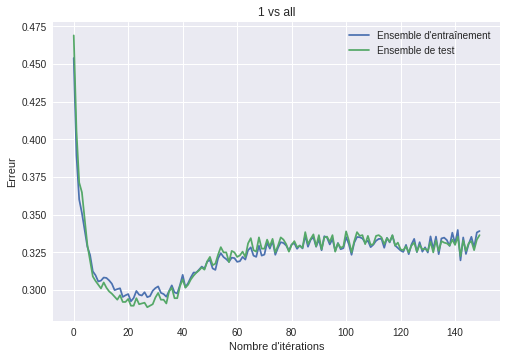

In [20]:
plt.figure()
model2.errors(x1alltrain, y1alltrain, "Ensemble d'entraînement")
model2.errors(x1alltest, y1alltest, "Ensemble de test")
plt.title("1 vs all")
plt.legend()

Pour cette dernière configuration, on n'observe pas non plus de  façon nette de surraprentissage.
On en conclut que le perceptron n'est pas particulièrement confronté aux problèmes de surraprentissage

# 3 Expressivité et feature map

## Question 3.1

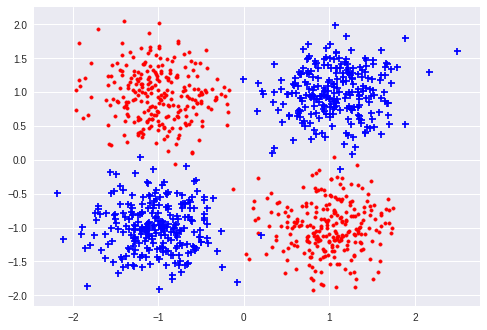

In [21]:
### Generation de donnees
xtrain,ytrain = gen_arti(data_type=1,epsilon=.2)
xtest,ytest = gen_arti(data_type=1,epsilon=.2)

plot_data(xtrain, ytrain)

plt.ion()


Cette nouvelle configuration simulée est plus complexe que la précédente.

Itérations de l'algorithme d'apprentissage ... 

0 [ 0.09870473]
20 [ 0.00081387]
40 [ 0.00047238]
60 [ 0.00067933]
80 [ 0.00066465]
100 [ 0.00051788]
120 [ 0.00048646]
140 [ 0.0007155]
160 [ 0.00043504]
180 [ 0.00091306]
200 [ 0.00043995]
220 [ 0.00026778]
240 [ 0.00020907]
260 [ 0.0004556]
280 [ 0.00020825]
300 [ 0.00063447]
320 [ 0.00043993]
340 [ 0.00080106]
360 [ 0.00050706]
380 [ 0.00050197]
400 [ 0.00044845]
420 [ 0.00033771]
440 [ 0.00050104]
460 [ 0.00047639]
480 [ 0.00067104]
score en train :  0.498
score en test :  0.501


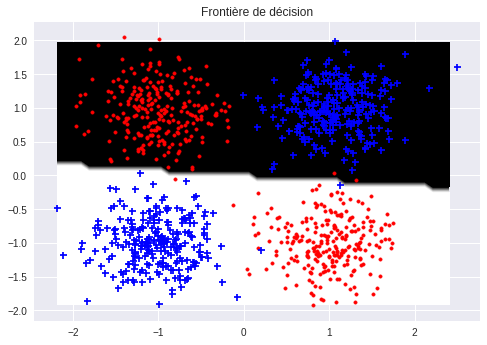

In [22]:
### Apprentissage
model= Perceptron(eps=1e-3, max_iter=500)
model.fit(xtrain,ytrain)
print("score en train : ",model.score(xtrain,ytrain))
print("score en test : ",model.score(xtest,ytest))
#### Tracer de frontiere
plt.figure()
plt.title("Frontière de décision")
plot_frontiere(xtrain,model.predict,50)
plot_data(xtrain,ytrain)

En effet, on remarque que la frontière ne peut pas être modélisée par une droite. Idéalement, il faudrait pouvoir faire "gagner en dimension" le perceptron.
Pour cela, nous allons implémenter plusieurs *feature maps* permettant de répondre à cette attente.

## Question 3.2 : Prolongement Polynomial

In [23]:
def poly(x):
    """Only works in 2D"""
    n, d = np.shape(x)
    assert(d == 2)
    res = np.ones((n, 6))
    res[:, 1:3] = x
    res[:, 3] = x[:, 0]*x[:, 1]
    res[:, 4:6] = x*x
    return res

In [24]:
print(poly(xtrain)[:3,:])

[[ 1.         -1.15504562 -1.1910552   1.3757231   1.3341304   1.4186125 ]
 [ 1.         -1.07923933  0.59719518 -0.64451653  1.16475753  0.35664209]
 [ 1.          1.25974783  0.75555646  0.95181061  1.5869646   0.57086556]]


Itérations de l'algorithme d'apprentissage ... 

0 [ 0.0564905]
20 [ 0.00188666]
40 [ 0.00093193]
60 [ 0.00081229]
80 [ 0.00076689]
100 [ 0.00074452]
120 [ 0.00071928]
140 [ 0.00069274]
160 [ 0.00067037]
180 [ 0.00064096]
200 [ 0.00062045]
220 [ 0.00059759]
240 [ 0.00057905]
260 [ 0.00056382]
280 [ 0.00055661]
300 [ 0.00054615]
320 [ 0.00054294]
340 [ 0.00053748]
360 [ 0.00053201]
380 [ 0.00052938]
400 [ 0.00052217]
420 [ 0.00051651]
440 [ 0.00051602]
460 [ 0.00051262]
480 [ 0.00050636]
score en train :  0.994
score en test :  0.989


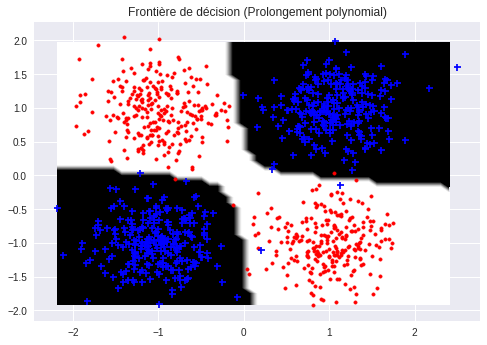

In [25]:
### Apprentissage
model= Perceptron(eps=1e-3, max_iter=500, projection=poly)
model.fit(xtrain,ytrain)
print("score en train : ",model.score(xtrain,ytrain))
print("score en test : ",model.score(xtest,ytest))
#### Tracer de frontiere
plt.figure()
plt.title("Frontière de décision (Prolongement polynomial)")
plot_frontiere(xtrain,model.predict,50)
plot_data(xtrain,ytrain)

En plongeant l'espace en dimension 5, on a pu augmenter l'expressivité de notre perceptron. Ainsi, la frontière obtenue modélise plus fidèlement la réalité.

## Question 3.3 : Plongement gaussien

La ième dimension dans l'espace projeté correspond à la probabilité d'observer $X=x$ si X suit une loi gaussienne de moyenne $o^i$ et de variance $\sigma$ à une facteur de normalisation près.

Les $o^i$ correspondent à $N_b$ gaussiennes. Une valeur très importante de $k(x, o^i)$ signifiera qu'il y a une forte probabilité que $x$ soit issue de la gaussienne de paramètres $(o^i, \sigma)$
**A COMPLETER**

In [26]:
def k(x, xp, sigma):
    xp = xp.reshape(-1)
    norm = np.linalg.norm(x - xp, axis=1)
    return np.exp(-norm*norm/(2*sigma**2))


def gauss(B, x, sigma=1):
    """Conventions
    B matrice de taille Nb*d
    x matrice de taille n*d"""
    nb, db = np.shape(B)
    nx, dx = np.shape(x)
    res = np.zeros((nx, nb))
    for i in range(nb):
        o = B[i, :]
        res[:, i] = k(x, o, sigma)
    return res

def B(x, nb=10, mode=1, sigma=1):
    nx, dx = np.shape(x)
    if mode==1: # Centres pris aléatoirement
        min_x, max_x = np.amin(x, axis=0), np.amax(x, axis=0)
        matb = np.random.rand(nb, dx)
        matb = (max_x-min_x)*matb + min_x
    
    else: # Centres pris dans la base d'apprentissage
        indices = range(nx)
        indices = np.random.permutation(indices)
        matb = x[indices[:nb],:] # Question: faut-il modifier x
    return matb


## Question 3.4